# Conditional Frequency Distributions

In [10]:
import nltk
from nltk.corpus import *

news_words = brown.words(categories='news')
print(len(news_words))
print(news_words)

romance_words = brown.words(categories='romance')
print(len(romance_words))
print(romance_words)

print(len(news_words)+len(romance_words))

100554
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
70022
['They', 'neither', 'liked', 'nor', 'disliked', 'the', ...]
170576


In [11]:
#pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]
#pairs = []
#for w in news_words:
#    pairs.append(('news',w))

pairs = [('news',w.lower()) for w in news_words]

print(len(pairs))
print(pairs)


100554
[('news', 'the'), ('news', 'fulton'), ('news', 'county'), ('news', 'grand'), ('news', 'jury'), ('news', 'said'), ('news', 'friday'), ('news', 'an'), ('news', 'investigation'), ('news', 'of'), ('news', "atlanta's"), ('news', 'recent'), ('news', 'primary'), ('news', 'election'), ('news', 'produced'), ('news', '``'), ('news', 'no'), ('news', 'evidence'), ('news', "''"), ('news', 'that'), ('news', 'any'), ('news', 'irregularities'), ('news', 'took'), ('news', 'place'), ('news', '.'), ('news', 'the'), ('news', 'jury'), ('news', 'further'), ('news', 'said'), ('news', 'in'), ('news', 'term-end'), ('news', 'presentments'), ('news', 'that'), ('news', 'the'), ('news', 'city'), ('news', 'executive'), ('news', 'committee'), ('news', ','), ('news', 'which'), ('news', 'had'), ('news', 'over-all'), ('news', 'charge'), ('news', 'of'), ('news', 'the'), ('news', 'election'), ('news', ','), ('news', '``'), ('news', 'deserves'), ('news', 'the'), ('news', 'praise'), ('news', 'and'), ('news', 'thanks

In [15]:
genre_word = [(genre, word.lower()) for genre in ['news', 'romance'] for word in brown.words(categories=genre)] 
print(len(genre_word))
print(genre_word[:10])
print(genre_word[-10:])

170576
[('news', 'the'), ('news', 'fulton'), ('news', 'county'), ('news', 'grand'), ('news', 'jury'), ('news', 'said'), ('news', 'friday'), ('news', 'an'), ('news', 'investigation'), ('news', 'of')]
[('romance', 'washington'), ('romance', 'episode'), ('romance', "''"), ('romance', '.'), ('romance', '``'), ('romance', "i'm"), ('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]


In [16]:
cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd)
cfd.conditions()


<ConditionalFreqDist with 2 conditions>


['news', 'romance']

In [8]:
print(cfd['news'])
print(cfd['romance'])
print(list(cfd['romance']))
cfd['romance']['could']


<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>
['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man', '.', 'To', 'them', 'he', 'could', 'have', 'been', 'broken', 'bell', 'in', 'church', 'tower', 'which', 'rang', 'before', 'and', 'after', 'Mass', ',', 'at', 'noon', 'six', 'each', 'evening', '--', 'its', 'tone', 'repetitive', 'monotonous', 'never', 'breaking', 'boredom', 'of', 'streets', 'The', 'was', 'unimportant', 'Yet', 'if', 'were', 'not', 'there', 'they', 'would', 'missed', 'him', 'as', 'sounds', 'bees', 'buzzing', 'against', 'screen', 'door', 'early', 'June', ';', 'or', 'smell', 'thick', 'tomato', 'paste', 'ripe', 'that', 'both', 'sweet', 'sour', 'rising', 'up', 'from', 'aluminum', 'trays', 'wrapped', 'fly-dotted', 'cheesecloth', 'Or', 'surging', 'whirling', 'bats', 'night', 'when', 'their', 'black', 'bodies', 'dived', 'into', 'blackness', 'above', 'below', 'amber', 'street', 'lights', 'bay', 'female', 'dogs', 'heat',

193

In [9]:
print(cfd['romance']['The'])
print(cfd['romance']['the'])
print(cfd['news']['The'])
print(cfd['news']['the'])

230
2758
806
5580


In [ ]:
#frequencies of modals in each catagories

cfd = nltk.ConditionalFreqDist((genre, word) \
                               for genre in brown.categories() \
                               for word in brown.words(categories=genre))
print(cfd.conditions())

genres = ['news', 'religion', 'hobbies', 'science_fiction','romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)


['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009']
<FreqDist with 604 samples and 1538 outcomes>
      american   citizen democracy 
1789         2         0         0 
1793         0         0         0 
1797         3         1         0 
1801         0         0         0 
1805         1         0         0 
1809         0         0         0 
1813         1         0         0 
1817         1         5         0 
1821         0         0         0 
1825         0         1         1 
1829         0         0         0 
1833         2         0         0 
1837         1         1         0 
1

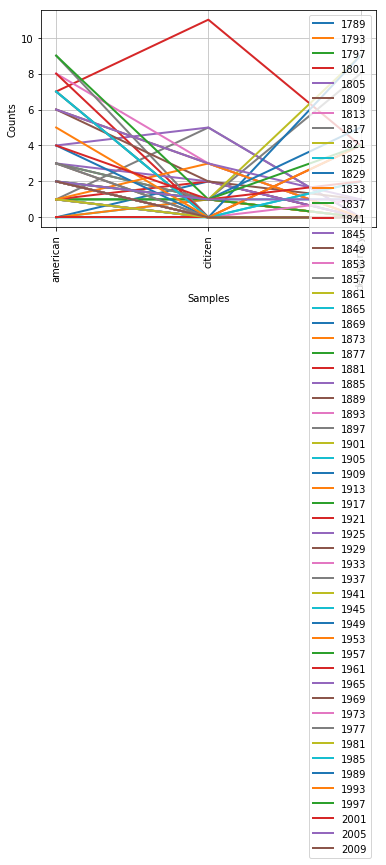

In [24]:
from nltk.corpus import inaugural
#print(inaugural.fileids())
#print([fileid[:4] for fileid in inaugural.fileids()])

cfd = nltk.ConditionalFreqDist((fileid[:4], word.lower()) \
                               for fileid in inaugural.fileids() \
                               for word in inaugural.words(fileid))
print(cfd.conditions())
print((cfd['1789']))

year = cfd.conditions()
wordlist = ['american','citizen','democracy']
cfd.tabulate(conditions=year, samples=wordlist)
cfd.plot(conditions=year, samples=wordlist)

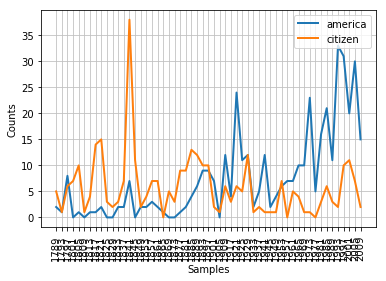

In [23]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) \
                               for fileid in inaugural.fileids() \
                               for w in inaugural.words(fileid) \
                               for target in ['america', 'citizen'] \
                               if w.lower().startswith(target))
cfd.plot()

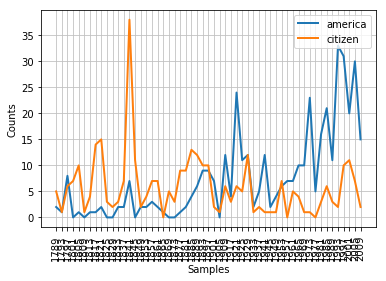

In [25]:
cfd = nltk.ConditionalFreqDist( (target, fileid[:4]) \
                               for fileid in inaugural.fileids() \
                               for w in inaugural.words(fileid) \
                               for target in ['america', 'citizen'] \
                               if w.lower().startswith(target))
cfd.plot()

In [25]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word,end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
print(cfd['living'])
print(list(cfd['living']))
generate_model(cfd, 'living')

<FreqDist with 6 samples and 16 outcomes>
['creature', 'thing', 'soul', '.', 'substance', ',']
living creature that he said , and the land of the land of the land 